<h1 style="color:orange">SPC for iid data </h1>



# EXERCISE 1 - IID Normal dist X-bar & R chart

Data reported in 'ESE06_ex1.csv' represent the diameters of spheres in a recirculating ball mechanism widely used in machine tool industry. The component is very critical and the tolerance is 10 ± 0.5mm. For each observation we measure 5 diameters.

Verify if the process is in control by using an X-bar and R chart.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE06_ex1.csv')

# Inspect the dataset
data.head()


,x1,x2,x3,x4,x5
0,10.10,10.04,10.13,9.98,10.14
1,10.28,10.13,9.78,9.94,9.83
2,9.95,10.36,9.90,9.96,9.96
3,9.88,9.89,9.98,9.74,10.14
4,10.12,9.83,10.14,9.81,9.86


> ### Solution
>
> Inspect the data by plotting the individual datapoints. 

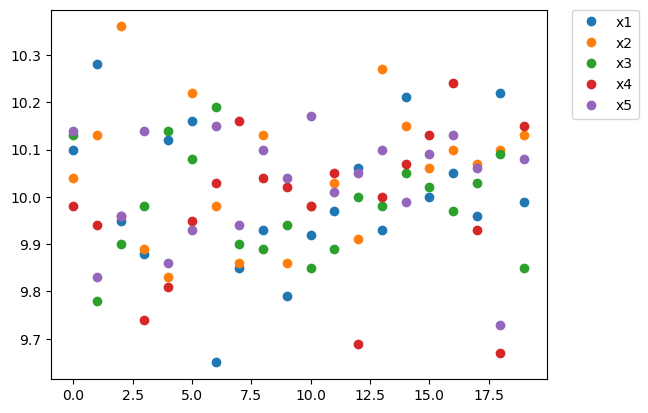

In [2]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['x5'], linestyle='none', marker='o', label = 'x5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> Doesn't look like strange patterns or outliers are present.
>
> We might also check randomness but we would need to know the within-sample order!

> Verify the assumption of normality, assuming all the data are from the same population.

p-value of the Shapiro-Wilk test: 0.753


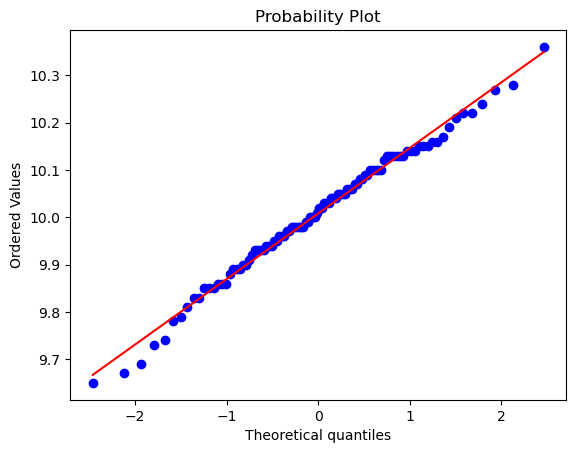

In [3]:
# Stack the data into a single column
data_stack = data.stack()

# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_stack)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

> Let's compute the mean and the range for each sample. 
> 
> *Note: we need to apply the mean and range functions to each row of the data frame.*

In [4]:
# Make a copy of the data
data_XR = data.copy()
# Add a column with the mean of the rows
data_XR['sample_mean'] = data.mean(axis=1)
# Add a column with the range of the rows
data_XR['sample_range'] = data.max(axis=1) - data.min(axis=1)

# Inspect the dataset
data_XR.head()

,x1,x2,x3,x4,x5,sample_mean,sample_range
0,10.10,10.04,10.13,9.98,10.14,10.078,0.16
1,10.28,10.13,9.78,9.94,9.83,9.992,0.50
2,9.95,10.36,9.90,9.96,9.96,10.026,0.46
3,9.88,9.89,9.98,9.74,10.14,9.926,0.40
4,10.12,9.83,10.14,9.81,9.86,9.952,0.33


> Now compute the grand mean and the mean of the ranges.

In [5]:
Xbar_mean = data_XR['sample_mean'].mean()
R_mean = data_XR['sample_range'].mean()

print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % R_mean)

Mean of the sample mean: 10.008
Mean of the sample range: 0.314


> Since there is no constraint on the choice of Type I error $\alpha$, we can set K = 3 ($\alpha$ = 0.0027)
>
> Remember the formulas for the control limits.
>
> **$\mathbf{\bar{X}}$ chart**:
> - $UCL = \overline{\overline{X}} + A_2(n) \overline{R}$
> - $CL = \overline{\overline{X}}$
> - $LCL = \overline{\overline{X}} - A_2(n) \overline{R}$
>
> **$R$ chart**:
> - $UCL = D_4(n) \overline{R}$
> - $CL = \overline{R}$
> - $LCL = D_3(n) \overline{R}$

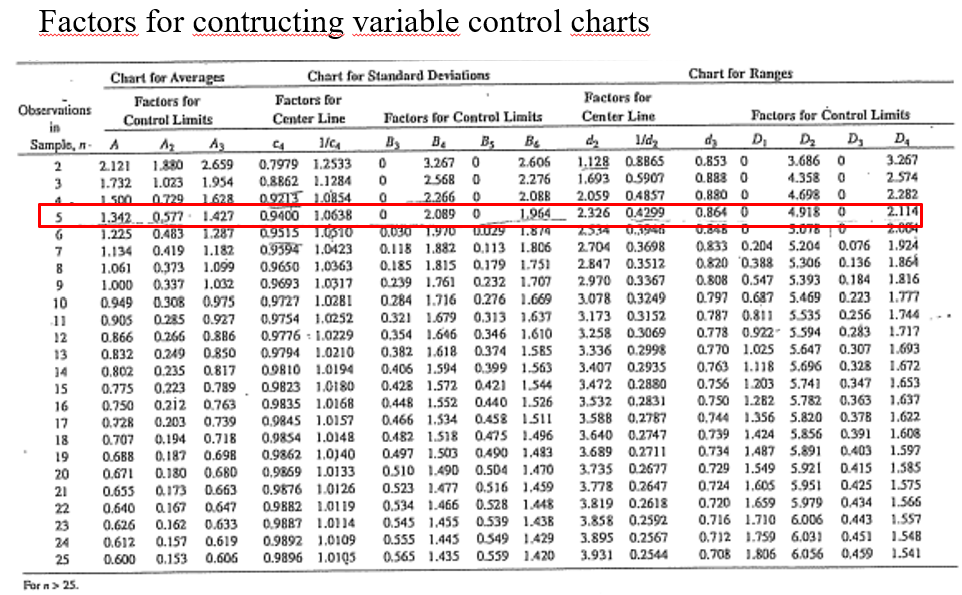

In [6]:
n = 5
A2 = 0.577
D3 = 0
D4 = 2.114

# Now we can compute the CL, UCL and LCL for Xbar and R
data_XR['Xbar_CL'] = Xbar_mean
data_XR['Xbar_UCL'] = Xbar_mean + A2 * R_mean
data_XR['Xbar_LCL'] = Xbar_mean - A2 * R_mean

data_XR['R_CL'] = R_mean
data_XR['R_UCL'] = D4 * R_mean
data_XR['R_LCL'] = D3 * R_mean

# Inspect the dataset
data_XR.head()

,x1,x2,x3,x4,x5,sample_mean,sample_range,Xbar_CL,Xbar_UCL,Xbar_LCL,R_CL,R_UCL,R_LCL
0,10.10,10.04,10.13,9.98,10.14,10.078,0.16,10.0082,10.189378,9.827022,0.314,0.663796,0.0
1,10.28,10.13,9.78,9.94,9.83,9.992,0.50,10.0082,10.189378,9.827022,0.314,0.663796,0.0
2,9.95,10.36,9.90,9.96,9.96,10.026,0.46,10.0082,10.189378,9.827022,0.314,0.663796,0.0
3,9.88,9.89,9.98,9.74,10.14,9.926,0.40,10.0082,10.189378,9.827022,0.314,0.663796,0.0
4,10.12,9.83,10.14,9.81,9.86,9.952,0.33,10.0082,10.189378,9.827022,0.314,0.663796,0.0


> Add two columns to store the violations of the control limits.

In [7]:
data_XR['Xbar_TEST1'] = np.where((data_XR['sample_mean'] > data_XR['Xbar_UCL']) | 
                (data_XR['sample_mean'] < data_XR['Xbar_LCL']), data_XR['sample_mean'], np.nan)
data_XR['R_TEST1'] = np.where((data_XR['sample_range'] > data_XR['R_UCL']) | 
                (data_XR['sample_range'] < data_XR['R_LCL']), data_XR['sample_range'], np.nan)

> Now plot the limits and the data in the charts.

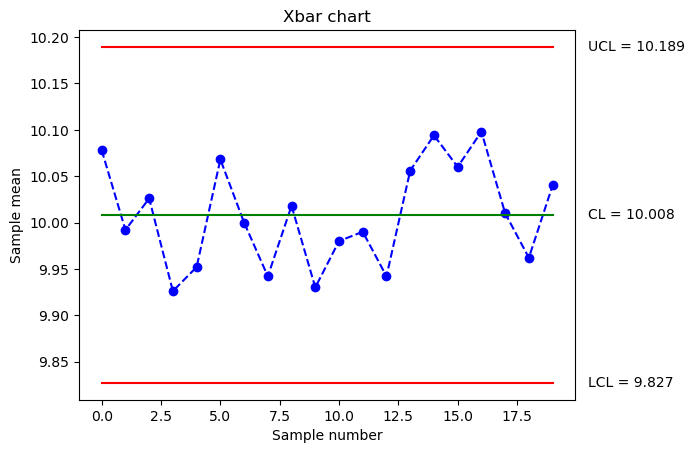

In [8]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XR['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['Xbar_UCL'], color='r')
plt.plot(data_XR['Xbar_CL'], color='g')
plt.plot(data_XR['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

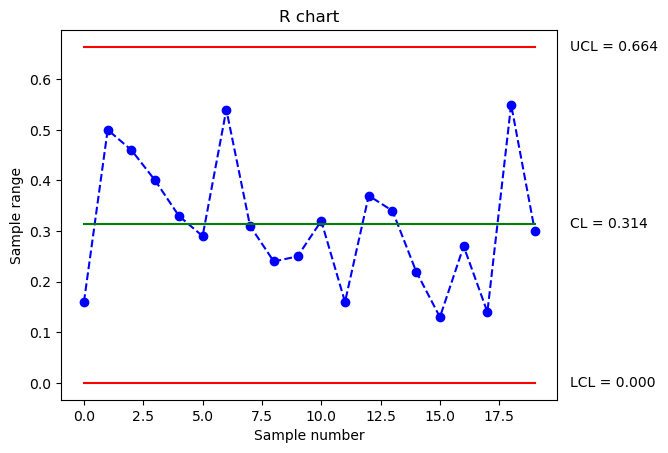

In [9]:
# Plot the R chart
plt.title('R chart')
plt.plot(data_XR['sample_range'], color='b', linestyle='--', marker='o')
plt.plot(data_XR['R_UCL'], color='r')
plt.plot(data_XR['R_CL'], color='g')
plt.plot(data_XR['R_LCL'], color='r')
plt.ylabel('Sample range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XR)+.5, data_XR['R_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XR['R_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_CL'].iloc[0], 'CL = {:.3f}'.format(data_XR['R_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XR)+.5, data_XR['R_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XR['R_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XR['R_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

> The process is in control.

> Alternatively, we can use the `XbarR` function from the `qcc.ControlCharts` package.

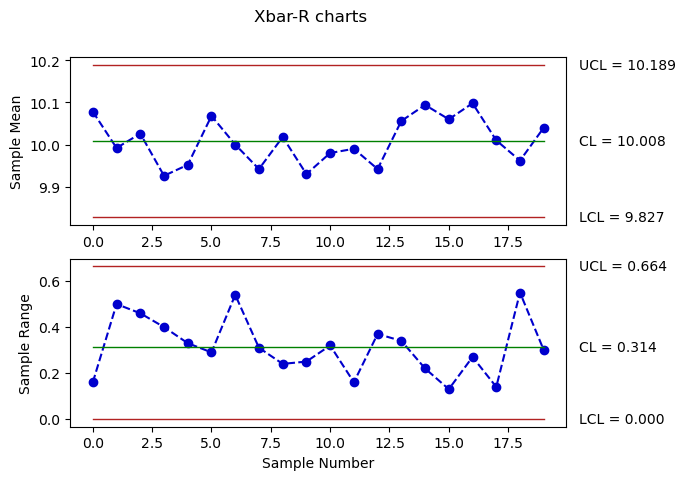

In [10]:
# Create the control chart with the data
data_XR_qcc = qda.ControlCharts.XbarR(data)

# EXERCISE 1 - Operation charac. curve (OC), ARL curve, $R$ stat, Confidence Interval

Given the previous dataset:
1. Redesign the X-bar and R chart in order to achieve in both the charts a Type I error equal to 0.002 (assuming that the normal approximation applies for both of them).
2. Determine the operating characteristic curve (OC) for the X-bar chart (by using K=3 and expressing the shift of the mean in standard deviation units)
3. Determine the corresponding ARL curve. 
4. Estimate the standard deviation through the statistic $R$.
5. Design the confidence interval on the process mean that corresponds to the control limits computed in point 1.

## Point 1
Redesign the X-bar and R chart in order to achieve in both the charts a Type I error equal to 0.002 (assuming that the normal approximation applies for both of them).

> ### Solution
>
> Assuming that the normal approximation applies for both of them, we need to find the value of K such that $\alpha = 0.002$:
> $$K = z_{\alpha/2}$$



In [11]:
# Compute the new K_alpha value
alpha = 0.002
K_alpha = stats.norm.ppf(1-alpha/2)

print('K = %.3f' % K_alpha)

K = 3.090


> Now let's design the control charts with the new value of K. 
>
> Remember the formulas for the control limits for $K \neq 3$.
>
> **$\mathbf{\bar{X}}$ chart**:
> - $UCL = \overline{\overline{X}} + z_{\alpha/2} \frac{1}{d_2 \sqrt{n}} \overline{R}$
> - $CL = \overline{\overline{X}}$
> - $LCL = \overline{\overline{X}} - z_{\alpha/2} \frac{1}{d_2 \sqrt{n}} \overline{R}$
>
> **$R$ chart**:
> - $UCL = \overline{R} + z_{\alpha/2} \frac{d_3}{d_2} \overline{R}$
> - $CL = \overline{R}$
> - $LCL = max(0;\ \overline{R} - z_{\alpha/2} \frac{d_3}{d_2} \overline{R})$

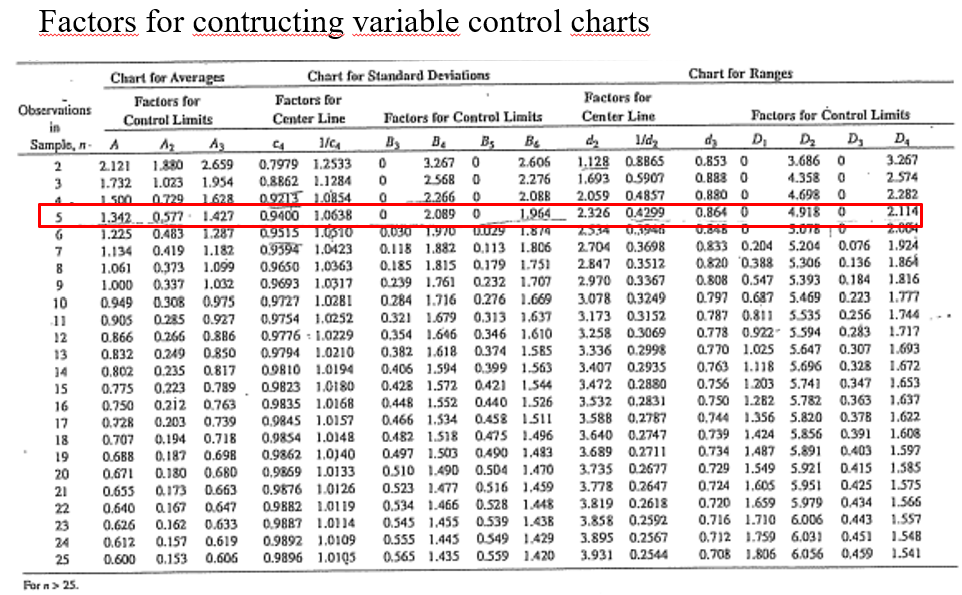

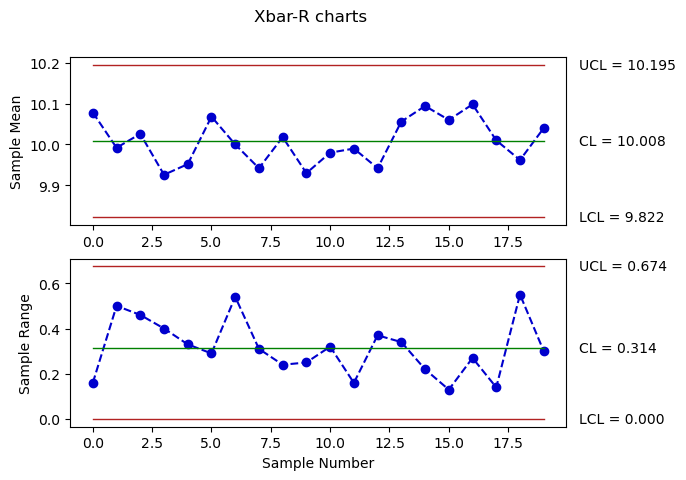

In [12]:
# We can use the same function again. This time we need to specify the new K_alpha value
data_XR_alpha = qda.ControlCharts.XbarR(data, K = K_alpha)

## Point 2

Determine the operating characteristic curve (OC) for the X-bar chart (by using K=3 and expressing the shift of the mean in standard deviation units).

> ### Solution
>
> To determine the OC curve, we need to compute the probability of $\beta$ for each value of the shift $\mu$.
> 
> We are testing the null hypothesis $H_0$ that the sample mean $\bar{X}$ is normally distributed with mean $\mu_0$ and variance $\sigma^2 / n$.
> $$H_0: \bar{X} \sim N(\mu_0, \sigma^2 / n)$$
>
> The alternative hypothesis is that the sample mean is normally distributed with mean $\mu_1$ and variance $\sigma^2 / n$.
> $$H_1: \bar{X} \sim N(\mu_1, \sigma^2 / n)$$
>
> So $\beta$ is the probability of not rejecting $H_0$ when $H_1$ is true.
> $$\beta = P(LCL \leq \bar{X} \leq UCL | H_1)$$
> $$\beta = P(Z \leq \frac{UCL - \mu_1}{\sigma / \sqrt{n}}) - P(Z \leq \frac{LCL - \mu_1}{\sigma / \sqrt{n}})$$
> If we define $\delta = (\mu_1 - \mu_0) / \sigma$, we can write:
> $$\beta = P(Z \leq 3 - \delta \sqrt{n}) - P(Z \leq -3 - \delta \sqrt{n})$$

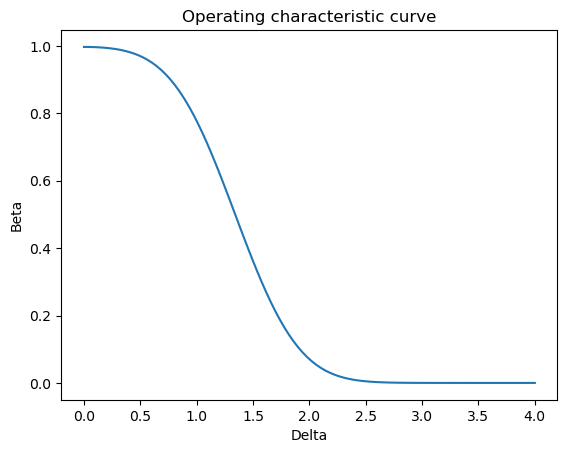

In [13]:
# Define a range of values for beta
delta = np.linspace(0, 4, 100)
# Compute the corresponding beta values
beta = stats.norm.cdf(3 - delta*np.sqrt(n)) - stats.norm.cdf(-3 - delta*np.sqrt(n))

# Plot the beta values
plt.plot(delta, beta)
plt.xlabel('Delta')
plt.ylabel('Beta')
plt.title('Operating characteristic curve')
plt.show()

## Point 3

Determine the corresponding ARL curve.

> ### Solution
>
> We know that the ARL curve is defined as:
> $$ARL = \frac{1}{1-\beta}$$

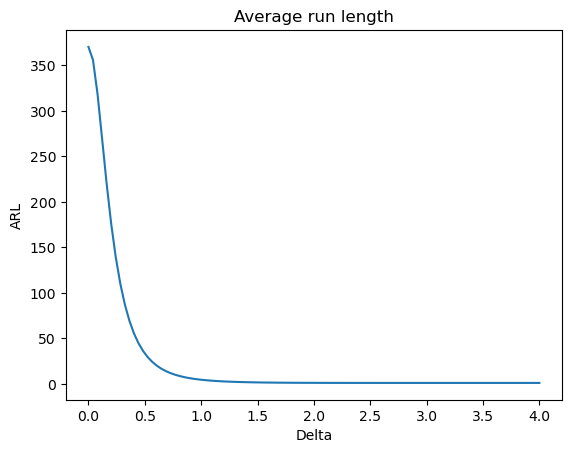

In [14]:
# Compute ARL using the previous values of beta
ARL = 1/(1-beta)

# Plot the ARL values
plt.plot(delta, ARL)
plt.xlabel('Delta')
plt.ylabel('ARL')
plt.title('Average run length')
plt.show()

## Point 4

Estimate the standard deviation through the statistic $R$.

> ### Solution
>
> The standard deviation is estimated through the statistic $R$ as:
> $$\hat{\sigma} = \frac{\bar{R}}{d_2(n)}$$

> You can use the function `getd2` from `qda.constants` to get the value of $d_2(n)$.

In [15]:
d2 = qda.constants.getd2(n)
sigma_hat = R_mean / d2
print('Sigma_hat = %.3f' % sigma_hat)

Sigma_hat = 0.135


## Point 5

Design the confidence interval on the process mean that corresponds to the control limits computed in point 1.

> ### Solution
>
> The confidence interval corresponding to the control limits computed in point 1 uses: 
> - $n = 5$
> - $\alpha = 0.002$
> - $\hat{\sigma} = 0.135$ (computed from the data)
> - $\overline{X} = 10.008$ (computed from the data)
>
> Remember the formula of the confidence interval (assume that $\hat{\sigma}$ is the real population variance):
> $$\bar{X} - z_{\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}} \leq \mu \leq \bar{X} + z_{\alpha/2} \frac{\hat{\sigma}}{\sqrt{n}}$$


> You can compute the CI using the formula or using the `interval` function from the `stats.norm` package.

In [16]:
CI = stats.norm.interval(1-alpha, loc=Xbar_mean, scale=sigma_hat/np.sqrt(n))
print('CI = (%.3f, %.3f)' % CI)

CI = (9.822, 10.195)


The CI limits correspond to the LCL and UCL of the control chart. Indeed, the X-bar control chart can be interpreted as a recursive application of the confidence interval on the mean along time t, assuming that the estimated sample variance is the real (population) variance.

# EXERCISE 2 - IID Non-Normal X-bar&R

Design an X-bar and R control chart for the data in `ESE06_ex2.csv`. Which conclusions can be drawn about the process?

In [17]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE06_ex2.csv')

# Inspect the dataset
data.head()

,x1,x2,x3,x4,x5
0,0.473,0.405,0.213,3.187,0.572
1,0.430,2.623,1.415,0.915,2.933
2,0.148,1.938,1.057,2.019,1.256
3,5.209,0.211,1.047,0.492,0.388
4,0.308,0.536,0.570,2.951,1.741


> ### Solution
>
> Inspect the data by plotting the individual datapoints. 

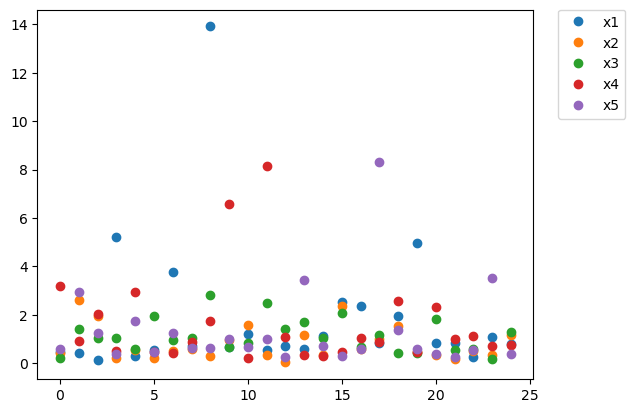

In [18]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['x5'], linestyle='none', marker='o', label = 'x5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

> Looks like outliers are present, or - more likely - the distribution is skewed.

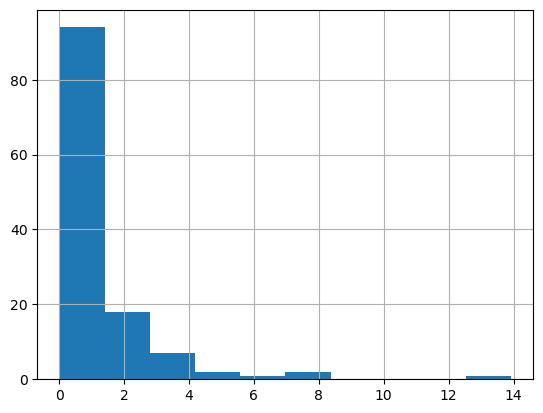

In [19]:
# Stack the data into a single column
data_stack = data.stack()

# Plot a histogram of the data_stack
data_stack.hist()
plt.show()

> The distribution is highly skewed.

> Verify the assumption of normality. 

p-value of the Shapiro-Wilk test: 0.000


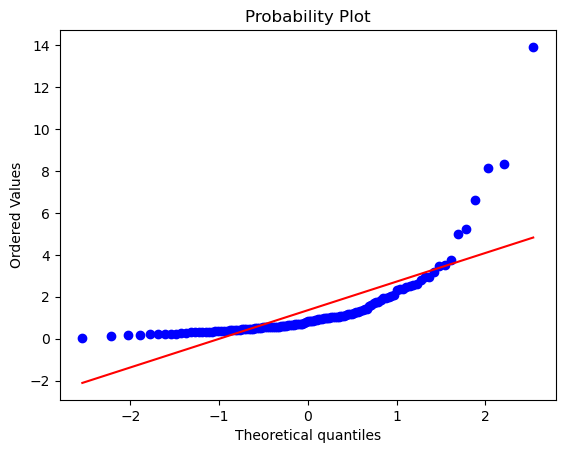

In [20]:
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_stack)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

> The data are non-normal. Therefore, we cannot use the X-bar and R chart on the raw data. We need to transform the data.
>
> But what happens if we neglect the normality violation and use the X-bar and R chart on the raw data?

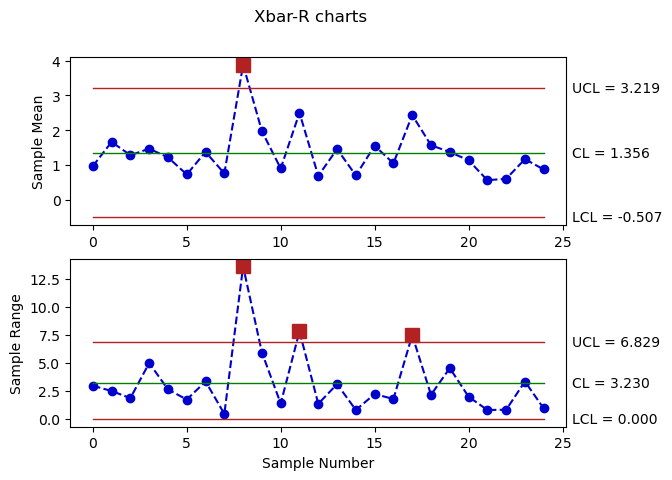

In [21]:
# X-bar and R charts
data_XR = qda.ControlCharts.XbarR(data)

> OOC observations may be due to a violation of control chart assumptions...

> Let's transform the data to make it more normal using the Box-Cox transformation.
>
> Remember the Box-Cox transformation is defined as:
> $$x_{BC,i} = \left\{ \begin{array}{ll} \frac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ \ln x_i & \text{if } \lambda = 0 \end{array} \right.$$

Lambda = -0.037


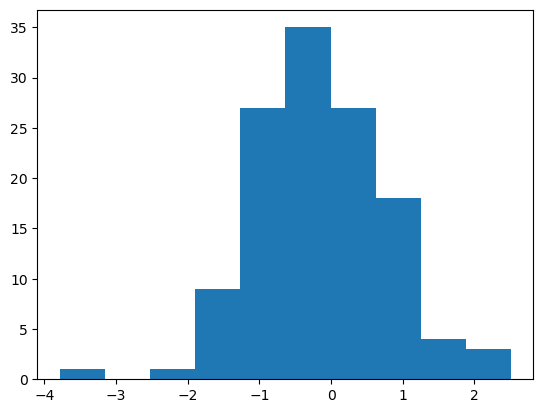

In [22]:
# Box-Cox transformation and return the transformed data
[data_BC, lmbda] = stats.boxcox(data_stack)

print('Lambda = %.3f' % lmbda)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

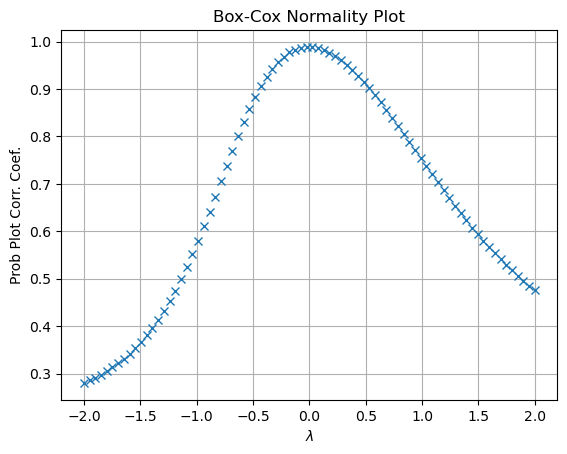

In [23]:
# It is also possible to find the best value of lambda for the transformation
fig = plt.figure()
ax = fig.add_subplot(111)
stats.boxcox_normplot(data_stack, -2, 2, plot=ax)
# add grid
ax.grid(True)

By default, the Box-Cox function used Lambda = -0.037. A more interpretable (and very close to optimum) value is Lambda = 0.

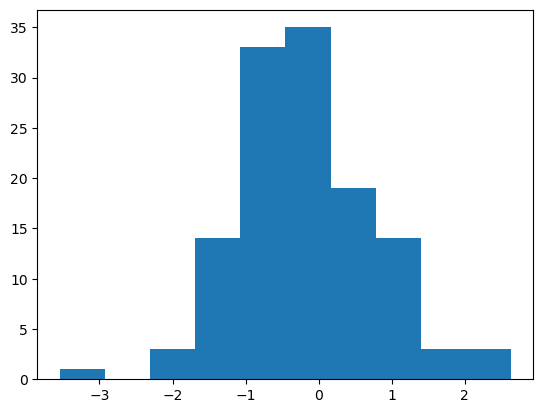

In [24]:
# Use lambda = 0 for Box-Cox transformation and return the transformed data
data_BC = stats.boxcox(data_stack, lmbda=0)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

> Now the data seem to follow a normal distribution. Let's verify this by testing the normality.

p-value of the Shapiro-Wilk test: 0.107


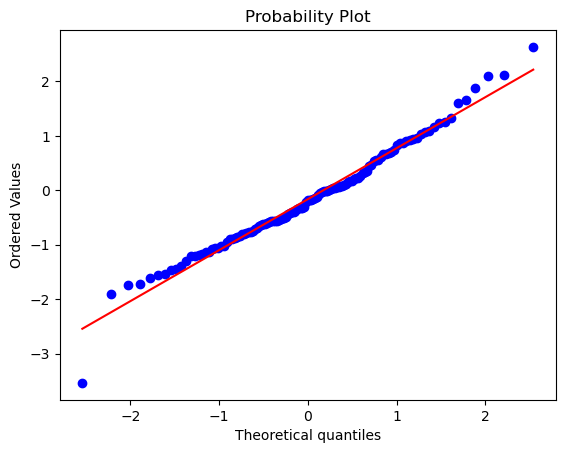

In [25]:
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_BC)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_BC, dist="norm", plot=plt)
plt.show()

> Normality is verified. We can now use the X-bar and R chart on the transformed data.

In [26]:
# First we need to unstack the data
data_BC_unstack = data_BC.reshape(data.shape)
# and convert it to a DataFrame
data_BC_unstack = pd.DataFrame(data_BC_unstack, columns = data.columns)

# Print out the transformed data
data_BC_unstack.head()

,x1,x2,x3,x4,x5
0,-0.748660,-0.903868,-1.546463,1.159080,-0.558616
1,-0.843970,0.964319,0.347130,-0.088831,1.076026
2,-1.910543,0.661657,0.055435,0.702602,0.227932
3,1.650388,-1.555897,0.045929,-0.709277,-0.946750
4,-1.177655,-0.623621,-0.562119,1.082144,0.554460


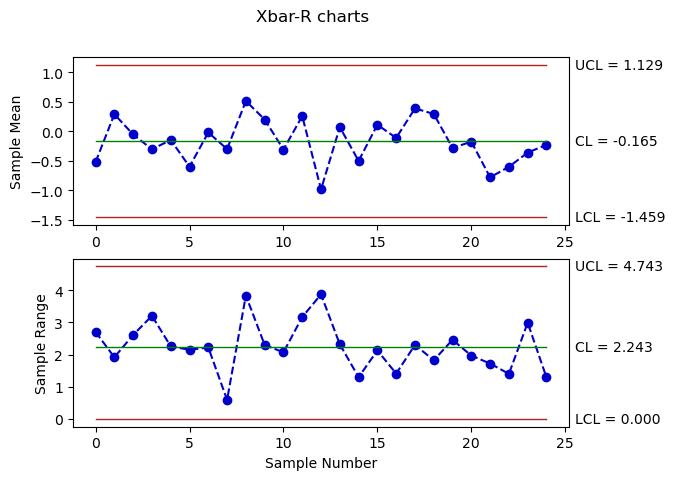

In [27]:
# X-bar and R charts
data_BC_XR = qda.ControlCharts.XbarR(data_BC_unstack)

> The X-bar and R chart show that the process is in control.

# EXERCISE 4 - IID Non-normal X-bar&S

The data in `ESE06_ex4.csv` report life-time measurements for electric circuits. Design an X-bar and S control chart.

In [28]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE06_ex4.csv')

# Inspect the dataset
data.head()

,x1,x2,x3,x4,x5
0,0.473,0.405,0.213,3.187,0.572
1,0.430,2.623,1.415,0.915,2.933
2,0.148,1.938,1.057,2.019,1.256
3,5.209,0.211,1.047,0.492,0.388
4,0.308,0.536,0.570,2.951,1.741


Perform some data snooping first. 

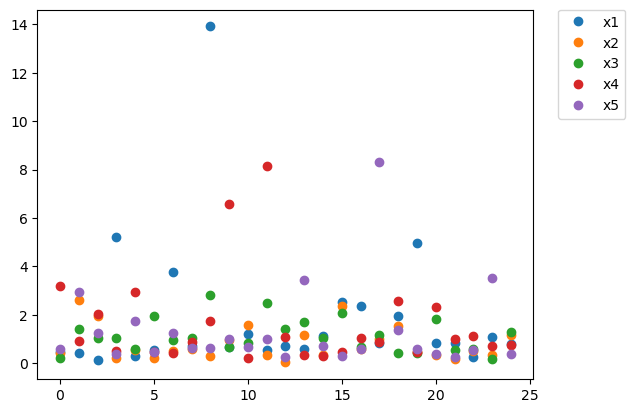

In [29]:
# Make a scatter plot of all the columns against the index
plt.plot(data['x1'], linestyle='none', marker='o', label = 'x1')
plt.plot(data['x2'], linestyle='none', marker='o', label = 'x2')
plt.plot(data['x3'], linestyle='none', marker='o', label = 'x3')
plt.plot(data['x4'], linestyle='none', marker='o', label = 'x4')
plt.plot(data['x5'], linestyle='none', marker='o', label = 'x5')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Some outliers are present. 

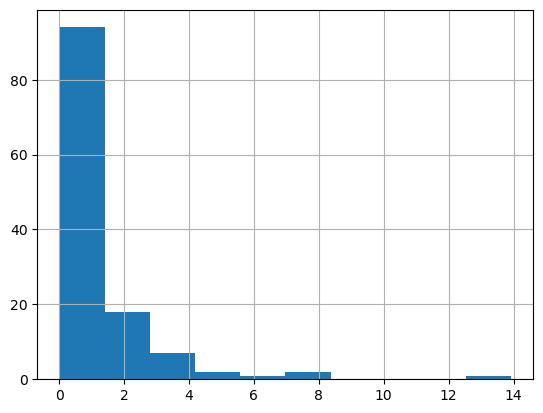

In [30]:
# Stack the data into a single column
data_stack = data.stack()

# Plot a histogram of the data_stack
data_stack.hist()
plt.show()

p-value of the Shapiro-Wilk test: 0.000


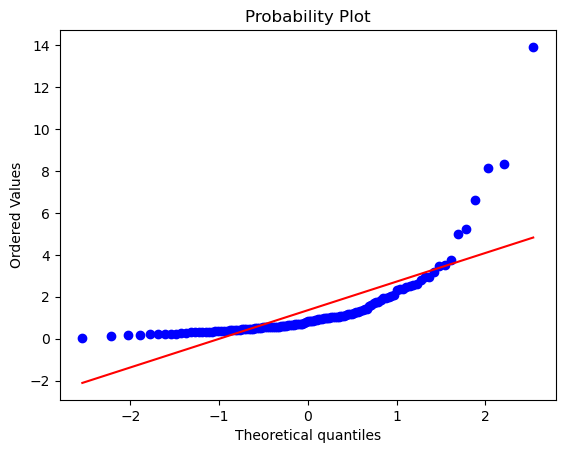

In [31]:
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_stack)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_stack, dist="norm", plot=plt)
plt.show()

The data are skewed and not normal. Let's try to transform them.

> Let's transform the data to make it more normal using the Box-Cox transformation.
>
> Remember the Box-Cox transformation is defined as:
> $$x_{BC,i} = \left\{ \begin{array}{ll} \frac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ \ln x_i & \text{if } \lambda = 0 \end{array} \right.$$

Lambda = -0.037


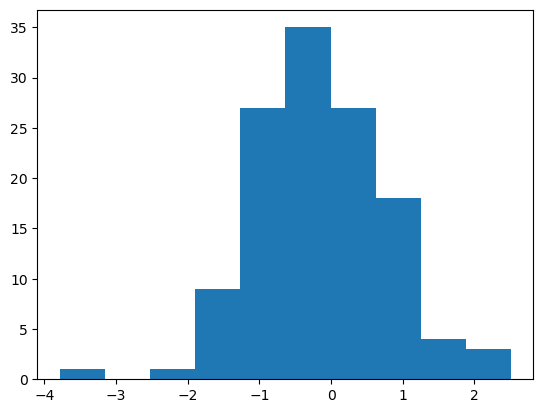

In [32]:
# Box-Cox transformation and return the transformed data
[data_BC, lmbda] = stats.boxcox(data_stack)

print('Lambda = %.3f' % lmbda)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

By default, the Box-Cox function used Lambda = -0.037. A more interpretable (and very close to optimum) value is Lambda = 0.

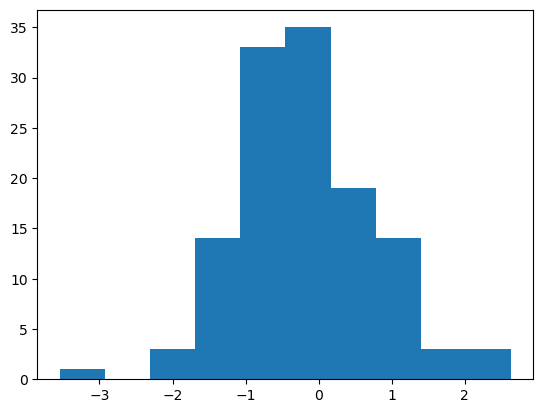

In [33]:
# Use lambda = 0 for Box-Cox transformation and return the transformed data
data_BC = stats.boxcox(data_stack, lmbda=0)

# Plot a histogram of the transformed data
plt.hist(data_BC)
plt.show()

> Now the data seem to follow a normal distribution. Let's verify this by testing the normality.

p-value of the Shapiro-Wilk test: 0.107


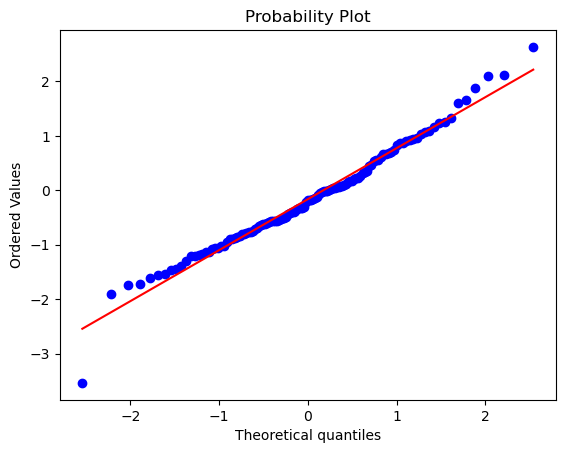

In [34]:
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data_BC)
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_BC, dist="norm", plot=plt)
plt.show()

> Normality is verified. We can now use the X-bar and R chart on the transformed data.

In [35]:
# First we need to unstack the data
data_BC_unstack = data_BC.reshape(data.shape)
# and convert it to a DataFrame
data_BC_unstack = pd.DataFrame(data_BC_unstack, columns = data.columns)

# Print out the transformed data
data_BC_unstack.head()

,x1,x2,x3,x4,x5
0,-0.748660,-0.903868,-1.546463,1.159080,-0.558616
1,-0.843970,0.964319,0.347130,-0.088831,1.076026
2,-1.910543,0.661657,0.055435,0.702602,0.227932
3,1.650388,-1.555897,0.045929,-0.709277,-0.946750
4,-1.177655,-0.623621,-0.562119,1.082144,0.554460


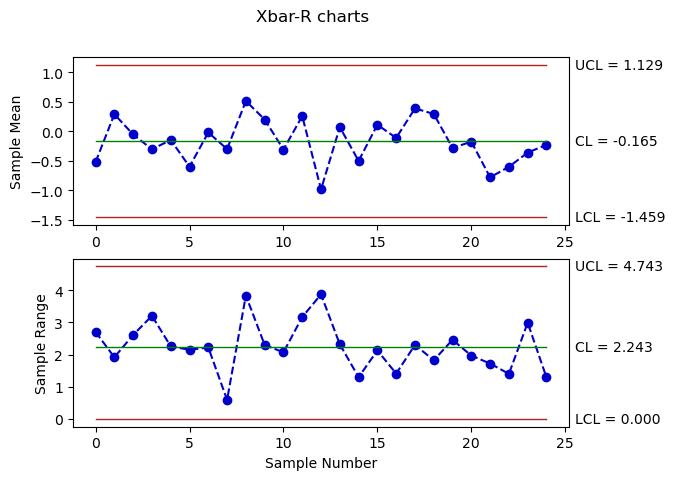

In [36]:
# X-bar and R charts
data_BC_XR = qda.ControlCharts.XbarR(data_BC_unstack)

The process is in control. Let's try now with the X-bar and S chart.

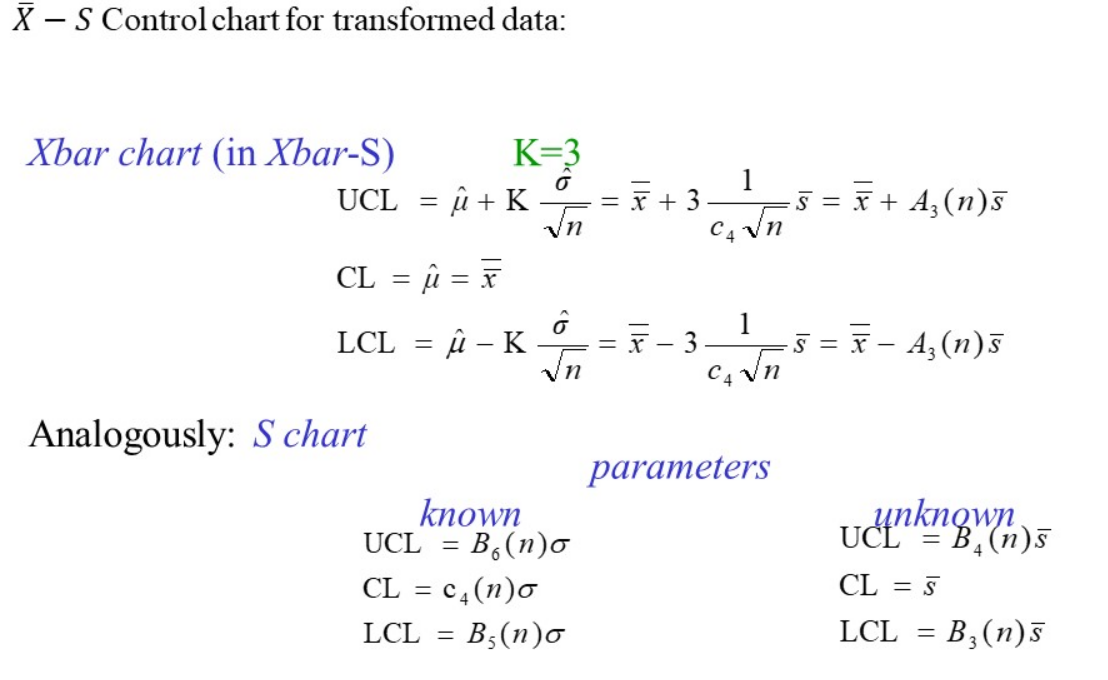

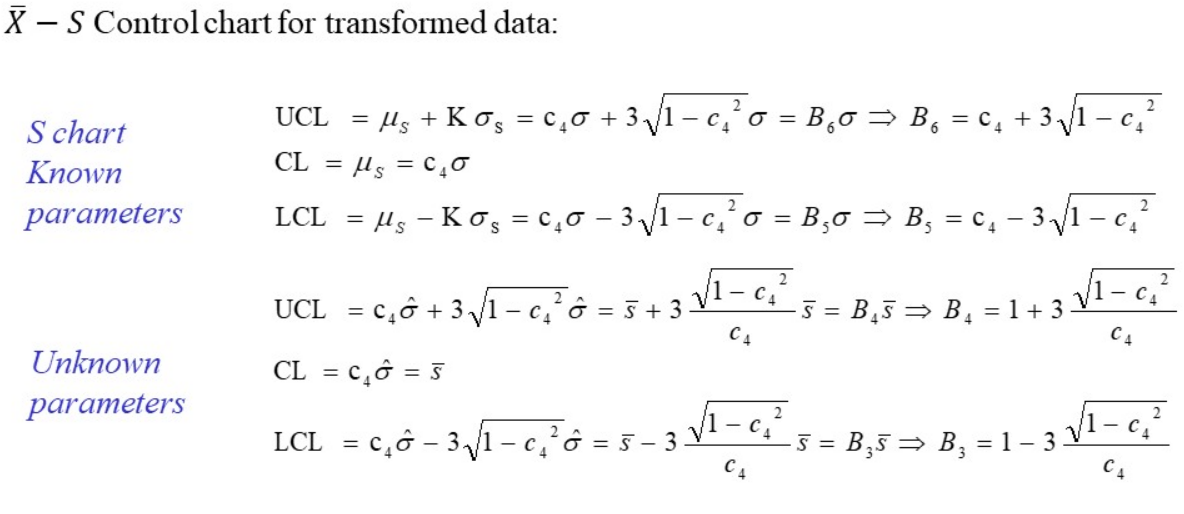

> Let's compute the mean and the range for each sample. 
> 
> *Note: we need to apply the mean and std functions to each row of the data frame.*

In [37]:
# Make a copy of the data
data_XS = data_BC_unstack.copy()
# Add a column with the mean of the rows
data_XS['sample_mean'] = data_BC_unstack.mean(axis=1)
# Add a column with the range of the rows
data_XS['sample_std'] = data_BC_unstack.std(axis=1)

# Inspect the dataset
data_XS.head()

,x1,x2,x3,x4,x5,sample_mean,sample_std
0,-0.748660,-0.903868,-1.546463,1.159080,-0.558616,-0.519705,1.009216
1,-0.843970,0.964319,0.347130,-0.088831,1.076026,0.290935,0.791392
2,-1.910543,0.661657,0.055435,0.702602,0.227932,-0.052583,1.075037
3,1.650388,-1.555897,0.045929,-0.709277,-0.946750,-0.303121,1.233562
4,-1.177655,-0.623621,-0.562119,1.082144,0.554460,-0.145358,0.930668


> Now compute the grand mean and the mean of the standard deviations.

In [38]:
Xbar_mean = data_XS['sample_mean'].mean()
S_mean = data_XS['sample_std'].mean()

print('Mean of the sample mean: %.3f' % Xbar_mean)
print('Mean of the sample range: %.3f' % S_mean)

Mean of the sample mean: -0.165
Mean of the sample range: 0.909


In [39]:
n = 5
K = 3
A3 = K * 1 / (qda.constants.getc4(n) * np.sqrt(n))
B3 = np.maximum(1 - K * (np.sqrt(1-qda.constants.getc4(n)**2)) / (qda.constants.getc4(n)), 0)
B4 = 1 + K * (np.sqrt(1-qda.constants.getc4(n)**2)) / (qda.constants.getc4(n))

# Now we can compute the CL, UCL and LCL for Xbar and S
data_XS['Xbar_CL'] = Xbar_mean
data_XS['Xbar_UCL'] = Xbar_mean + A3 * S_mean
data_XS['Xbar_LCL'] = Xbar_mean - A3 * S_mean

data_XS['S_CL'] = S_mean
data_XS['S_UCL'] = B4 * S_mean
data_XS['S_LCL'] = B3 * S_mean

# Inspect the dataset
data_XS.head()

,x1,x2,x3,x4,x5,sample_mean,sample_std,Xbar_CL,Xbar_UCL,Xbar_LCL,S_CL,S_UCL,S_LCL
0,-0.748660,-0.903868,-1.546463,1.159080,-0.558616,-0.519705,1.009216,-0.164846,1.132224,-1.461916,0.908758,1.898394,0.0
1,-0.843970,0.964319,0.347130,-0.088831,1.076026,0.290935,0.791392,-0.164846,1.132224,-1.461916,0.908758,1.898394,0.0
2,-1.910543,0.661657,0.055435,0.702602,0.227932,-0.052583,1.075037,-0.164846,1.132224,-1.461916,0.908758,1.898394,0.0
3,1.650388,-1.555897,0.045929,-0.709277,-0.946750,-0.303121,1.233562,-0.164846,1.132224,-1.461916,0.908758,1.898394,0.0
4,-1.177655,-0.623621,-0.562119,1.082144,0.554460,-0.145358,0.930668,-0.164846,1.132224,-1.461916,0.908758,1.898394,0.0


> Add two columns to store the violations of the control limits.

In [40]:
data_XS['Xbar_TEST1'] = np.where((data_XS['sample_mean'] > data_XS['Xbar_UCL']) | 
                (data_XS['sample_mean'] < data_XS['Xbar_LCL']), data_XS['sample_mean'], np.nan)
data_XS['S_TEST1'] = np.where((data_XS['sample_std'] > data_XS['S_UCL']) | 
                (data_XS['sample_std'] < data_XS['S_LCL']), data_XS['sample_std'], np.nan)

> Now plot the limits and the data in the charts.

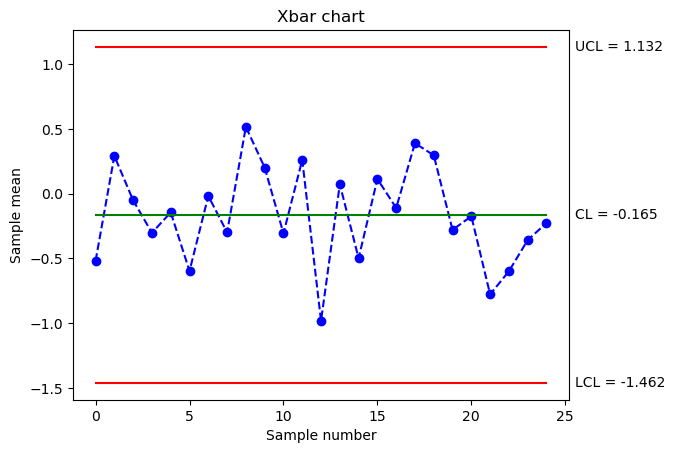

In [41]:
# Plot the Xbar chart
plt.title('Xbar chart')
plt.plot(data_XS['sample_mean'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['Xbar_UCL'], color='r')
plt.plot(data_XS['Xbar_CL'], color='g')
plt.plot(data_XS['Xbar_LCL'], color='r')
plt.ylabel('Sample mean')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['Xbar_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['Xbar_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['Xbar_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['Xbar_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['Xbar_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['Xbar_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

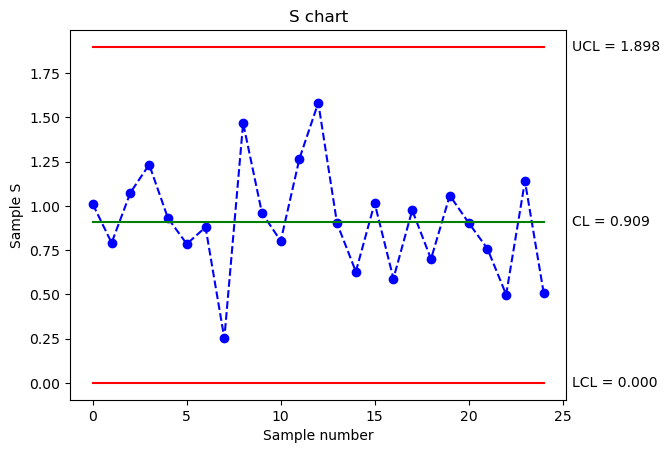

In [42]:
# Plot the S chart
plt.title('S chart')
plt.plot(data_XS['sample_std'], color='b', linestyle='--', marker='o')
plt.plot(data_XS['S_UCL'], color='r')
plt.plot(data_XS['S_CL'], color='g')
plt.plot(data_XS['S_LCL'], color='r')
plt.ylabel('Sample S')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(data_XS)+.5, data_XS['S_UCL'].iloc[0], 'UCL = {:.3f}'.format(data_XS['S_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_CL'].iloc[0], 'CL = {:.3f}'.format(data_XS['S_CL'].iloc[0]), verticalalignment='center')
plt.text(len(data_XS)+.5, data_XS['S_LCL'].iloc[0], 'LCL = {:.3f}'.format(data_XS['S_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(data_XS['S_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

In alternative, you can use the `XbarS` function from the `qda` package.

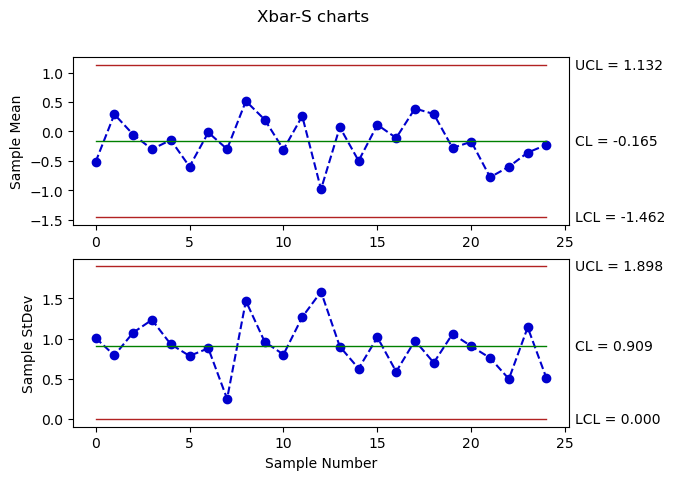

In [43]:
# X-bar and S charts
data_BC_XS = qda.ControlCharts.XbarS(data_BC_unstack)

# EXERCISE 3 - Time series Control Chart I-MR

The data of `ESE06_ex3.csv` report the daily changes of the General Motors Co. closing prices since September 4, 1998 to November 27, 1998. 
1. Design a suitable quality control tool by assuming the
existence of an assignable cause for the OOC observations if any. 
2. Determine if the values reported in the array `new_obs` are IC (use the previously designed control chart point 1). 
`new_obs = np.array((1.327, 1.594, 0.716, 1.767, 0.915, 2.524, 0.563, 2.053))`

In [44]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE06_ex3.csv')

# Inspect the dataset
data.head()

,GM
0,-0.875
1,2.437
2,-1.187
3,-2.063
4,0.938


## Point 1

Design a suitable quality control tool by assuming the existence of an assignable cause for the OOC observations (if any).

> ### Solution
>
> Let's plot the data first.

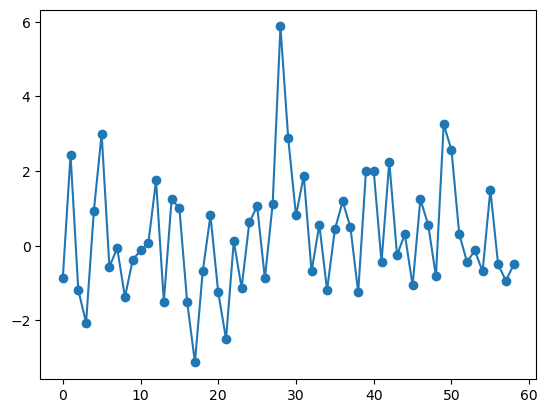

In [45]:
# Plot the data
plt.plot(data, 'o-')
plt.show()

> Looks like there's one point with a value much higher than the others. But let's test all assumptions first.

> Perform the runs test to check if the data are random. Use the `runstest_1samp` function from the `statsmodels` package.

In [46]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['GM'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))


Runs test p-value = 0.879


> Plot the autocorrelation and partial autocorrelation functions of the data. Use the `plot_acf` and `plot_pacf` functions from the `statsmodels` package.

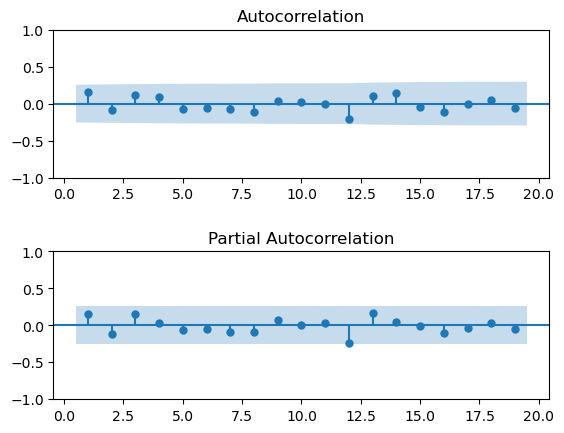

In [47]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['GM'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['GM'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> From the results of the autocorrelation and the runs tests, there is no statistical evidence to assume non randomness of the process. 

> Now let's verify the normality assumption. 

Shapiro-Wilk test p-value = 0.068


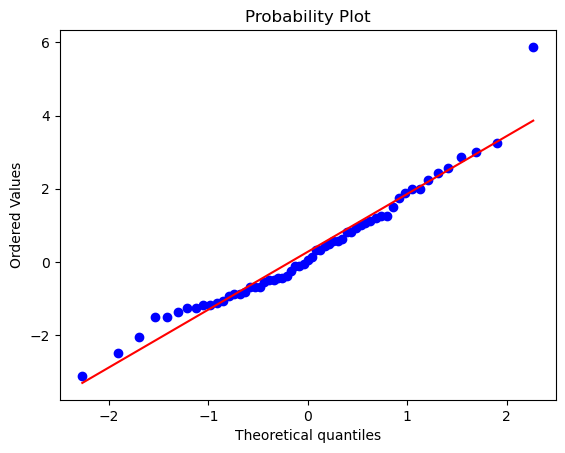

In [48]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data['GM'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data['GM'], dist="norm", plot=plt)
plt.show()

> We cannot reject the null hypothesis that the data are normally distributed with confidence 95%. However, one point deserves attention, as it is responsible for borderline normality.

> Let's go ahead with the design of the I-MR control chart. 
>
> Remember, the computation of moving ranges $MR$:
> 1. Compute the differences between consecutive observations (lag = 1): $D_i = X_{i+1} - X_i$.
> 2. Compute the absolute values of the differences: $MR = |D_i|$.


In [49]:
# Compute the moving ranges using the diff function
data['MR'] = data['GM'].diff().abs()

# Print out descriptive statistics of MR and time
data.describe()

,GM,MR
count,59.000000,58.000000
mean,0.275424,1.743603
std,1.581153,1.091674
min,-3.125000,0.000000
25%,-0.844000,0.749500
50%,0.062000,1.718500
75%,1.156500,2.484500
max,5.875000,4.750000


> Now let's make the control chart for the mean of the moving ranges.
>
> Remember the formulas for the control limits.
>
> **I chart**:
> - $UCL = \bar{x} + 3 \left(\frac{\bar{MR}}{d_2} \right)$
> - $CL = \bar{x}$
> - $LCL = \bar{x} - 3 \left(\frac{\bar{MR}}{d_2} \right)$
>
> **MR chart**:
> - $UCL = D_4 \bar{MR}$
> - $CL = \bar{MR}$
> - $LCL = 0$

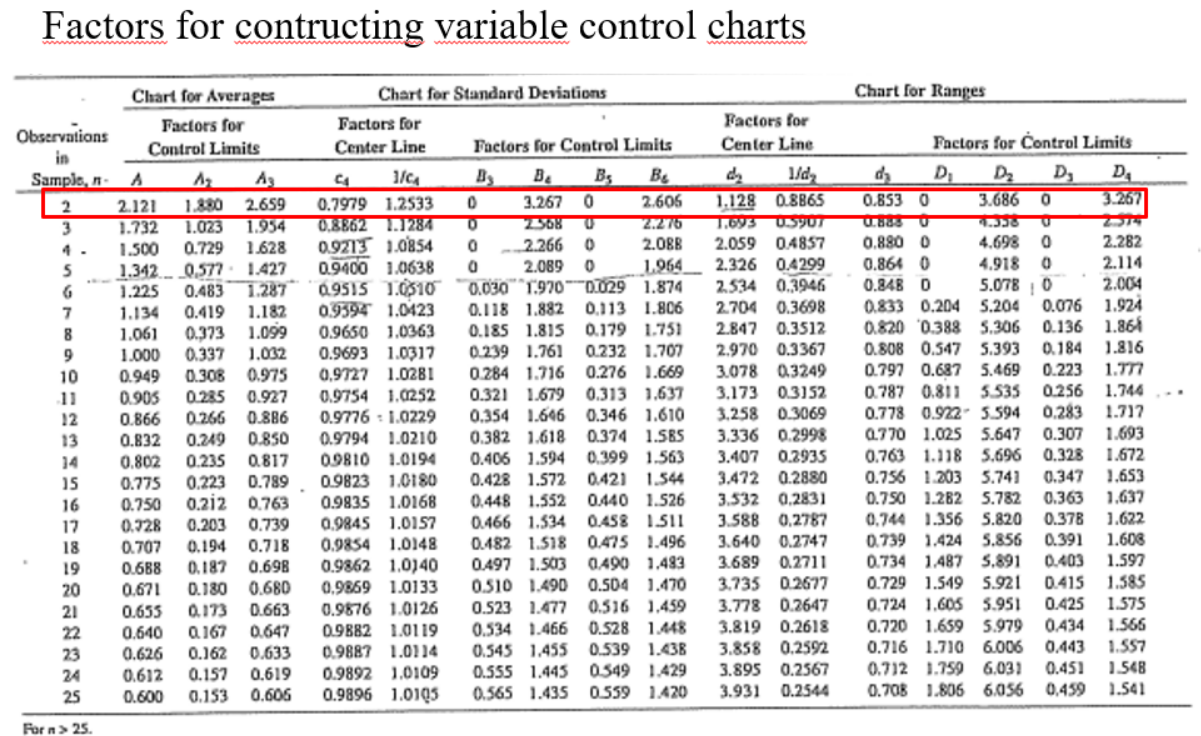

In [50]:
# Define the control limits
d2 = 1.128
D4 = 3.267

# make a copy of the data
df = data.copy()
# change the name of the column time to I
df.rename(columns={'GM':'I'}, inplace=True)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR
0,-0.875,NaN
1,2.437,3.312
2,-1.187,3.624
3,-2.063,0.876
4,0.938,3.001


In [51]:
# Create columns for the upper and lower control limits
df['I_UCL'] = df['I'].mean() + (3*df['MR'].mean()/d2)
df['I_CL'] = df['I'].mean()
df['I_LCL'] = df['I'].mean() - (3*df['MR'].mean()/d2)
df['MR_UCL'] = D4 * df['MR'].mean()
df['MR_CL'] = df['MR'].mean()
df['MR_LCL'] = 0

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL
0,-0.875,NaN,4.912667,0.275424,-4.361819,5.696352,1.743603,0
1,2.437,3.312,4.912667,0.275424,-4.361819,5.696352,1.743603,0
2,-1.187,3.624,4.912667,0.275424,-4.361819,5.696352,1.743603,0
3,-2.063,0.876,4.912667,0.275424,-4.361819,5.696352,1.743603,0
4,0.938,3.001,4.912667,0.275424,-4.361819,5.696352,1.743603,0


In [52]:

# Define columns for possible violations of the control limits
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | 
                (df['I'] < df['I_LCL']), df['I'], np.nan)
df['MR_TEST1'] = np.where((df['MR'] > df['MR_UCL']) | 
                (df['MR'] < df['MR_LCL']), df['MR'], np.nan)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,-0.875,NaN,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
1,2.437,3.312,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
2,-1.187,3.624,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
3,-2.063,0.876,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
4,0.938,3.001,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN


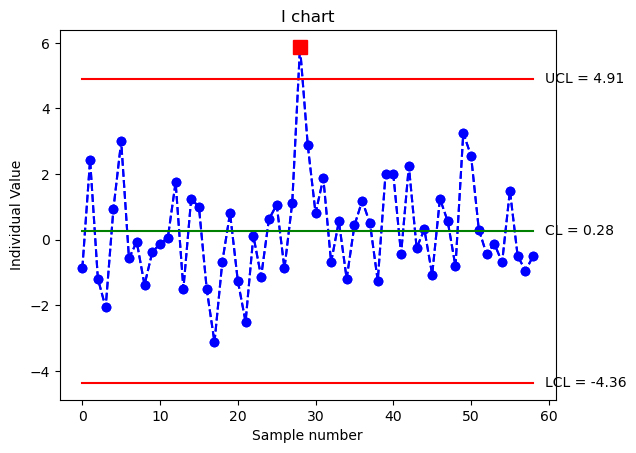

In [53]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.2f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

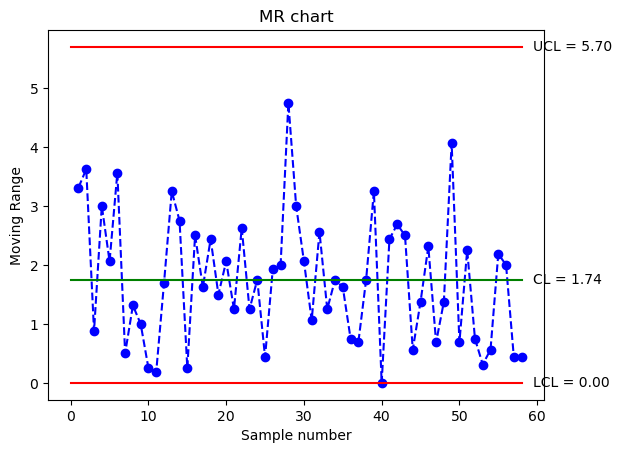

In [54]:
plt.title('MR chart')
plt.plot(df['MR'], color='b', linestyle='--', marker='o')
plt.plot(df['MR_UCL'], color='r')
plt.plot(df['MR_CL'], color='g')
plt.plot(df['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_CL'].iloc[0], 'CL = {:.2f}'.format(df['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

> There is one point outside the control limits. 

> You can also design the control chart using the `IMR` function in `qda.ControlCharts` package.

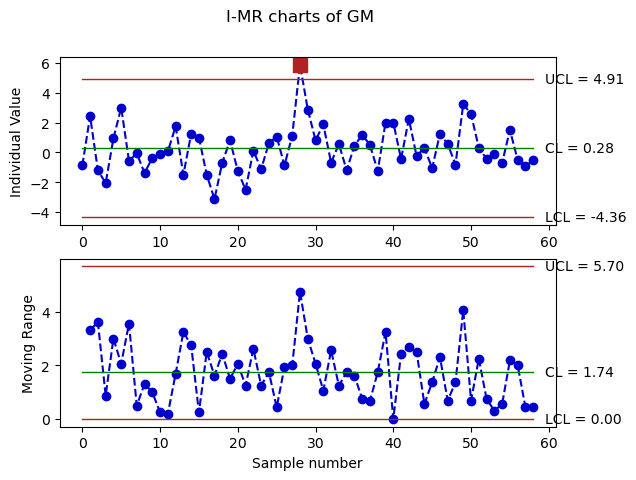

In [55]:
data_IMR = qda.ControlCharts.IMR(data, 'GM')

> Let's find the index of the OOC point.

In [56]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [28]


Index 28 (i.e. **the 29th** observation) is the one that is out of control.

> Assume we found an assignable cause for the OOC point, we have to remove it from the data.

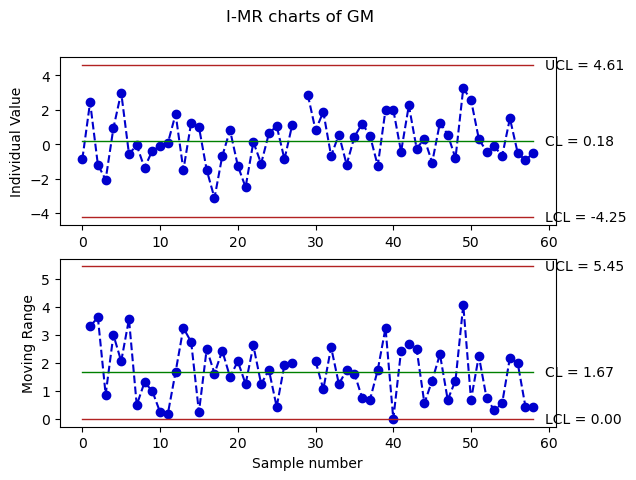

In [57]:
# make a copy of the data
data_2 = data.copy()
# replace the OOC point with NaN
data_2['GM'].iloc[OOC_idx] = np.nan

# Plot the new control chart
data_IMR_2 = qda.ControlCharts.IMR(data_2, 'GM')

## Point 2 - Phase 2

Determine if the values reported in the array `new_obs` are IC (use the previously designed control chart point 1).

In [58]:
pd.__version__

'1.3.5'

In [59]:
# Import the dataset
data = pd.read_csv('ESE06_ex3.csv')
# replace the OOC point with NaN
data['GM'].iloc[OOC_idx] = np.nan

# Define the array with the new observations
new_obs = np.array((1.327, 1.594, 0.716, 1.767, 0.915, 2.524, 0.563, 2.053))

# Add the new observations to the dataset
new_data = pd.concat([data, pd.DataFrame(new_obs, columns=['GM'])], ignore_index=True)

new_data.tail(10)

,GM
57,-0.937
58,-0.500
59,1.327
60,1.594
61,0.716
62,1.767
63,0.915
64,2.524
65,0.563
66,2.053


Use the parameter `subset_size` to specify the number of observations to be used for the computation of the control limits (Phase 1 data).

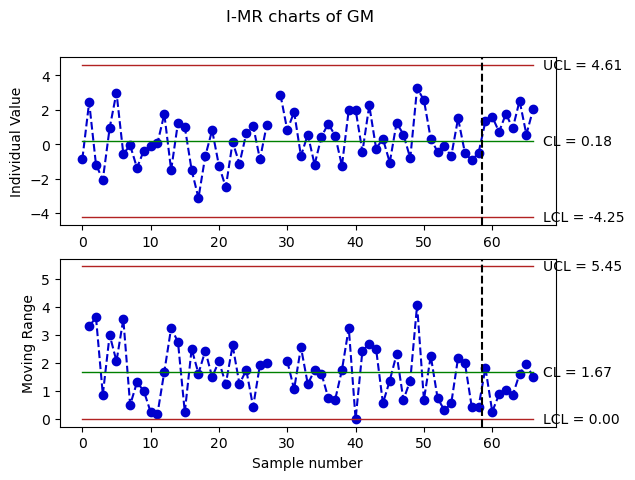

In [60]:
new_data_IMR = qda.ControlCharts.IMR(new_data, 'GM', subset_size=len(data))

The new data (Phase II) are in-control

# EXERCISE 3 (continued) - I-MR with probability limits

By using the dataset of Exercise 3 (the one related to the design phase), design an I-MR control chart with probability limits (i.e., use the true distribution of both statistics) with $\alpha=0.01$.

With regard to the MR chart, use both the half-normal distribution and the data transformation.



In [61]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE06_ex3.csv')

# Inspect the dataset
data.head()

,GM
0,-0.875
1,2.437
2,-1.187
3,-2.063
4,0.938


> ### Solution
> From the solution of Exercise 3, we know that the data are normally distributed and random. 
> Let's find the new value of K for designing the IMR control chart. 

In [62]:
alpha = 0.01
K_alpha = stats.norm.ppf(1-alpha/2)
print('New K value = %.3f' % K_alpha)

New K value = 2.576


> Remove the OOC we observed in Exercise 3.

In [63]:
OOC_idx = 28
data['GM'].iloc[OOC_idx] = np.nan

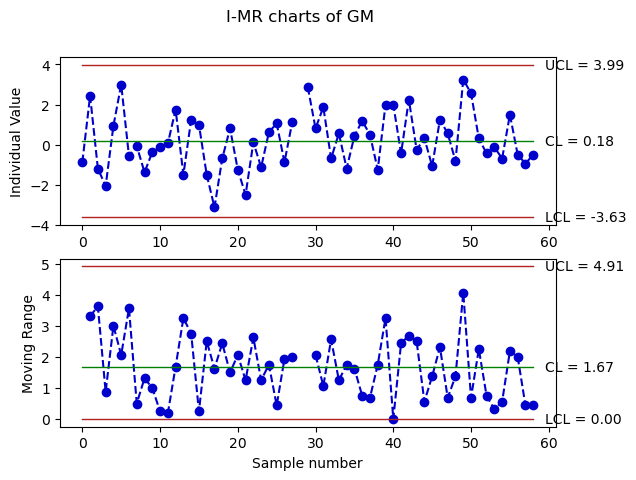

In [64]:
# Design the IMR control chart
data_IMR = qda.ControlCharts.IMR(data, 'GM', K = K_alpha)

> Let's redesign the MR control chart by using the half-normal approximation first:
> - $UCL = D_{1-\alpha/2} \frac{\bar{MR}}{d_2}$
> - $LCL = D_{\alpha/2} \frac{\bar{MR}}{d_2}$
>
> For $n=2$ (Alwan, Appendix A):
> - $D_{1-\alpha/2} = \sqrt{2} z_{alpha/4}$
> - $D_{\alpha/2} = \sqrt{2} z_{1/2 - alpha/4}$

In [65]:
D_UCL = np.sqrt(2) * stats.norm.ppf(1-alpha/4)
D_LCL = np.sqrt(2) * stats.norm.ppf(1 - (1/2 - alpha/4))

MR_UCL = D_UCL * data_IMR['MR'].mean()/qda.constants.getd2(2)
MR_LCL = D_LCL * data_IMR['MR'].mean()/qda.constants.getd2(2)

print('MR_UCL = %.4f' % MR_UCL)
print('MR_LCL = %.4f' % MR_LCL)

MR_UCL = 5.8664
MR_LCL = 0.0131


> Let's plot the MR chart with the half-normal approximation.

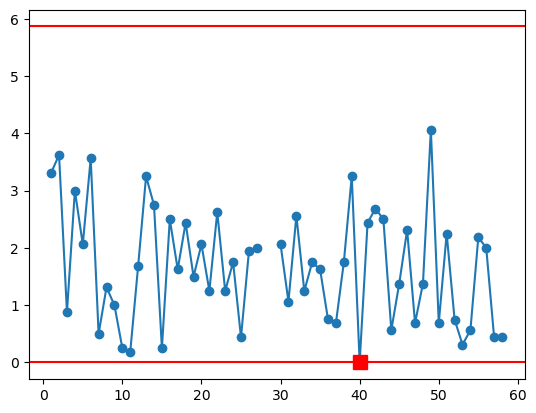

In [66]:
data_IMR['MR_TEST1'] = np.where((data_IMR['MR'] > MR_UCL) | 
                                (data_IMR['MR'] < MR_LCL), data_IMR['MR'], np.nan)

plt.plot(data_IMR['MR'], 'o-')
plt.axhline(MR_UCL, color = 'r')
plt.axhline(MR_LCL, color = 'r')
plt.plot(data_IMR['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

> Now, let's use the normality transformation on the MR data.
> 
> We know we can apply a known transformation ($\lambda = 0.4$).
>
> Attention: Box-Cox is not directly applicable to MR data because we have an observation equal to 0. 

In [67]:
# Extract the 'MR' column   
MR = pd.DataFrame(data_IMR['MR'])
# Get the index of the value equal to 0
idx = MR[MR['MR'] == 0].index[0]
# Change it to NaN
MR['MR'].iloc[idx] = np.nan
# Transform the data
MR['MR'] = MR['MR'].transform(lambda x: ((x**0.4)))
# Replace the NaN value with 0
MR['MR'].iloc[idx] = 0

p-value of the Shapiro-Wilk test: 0.047


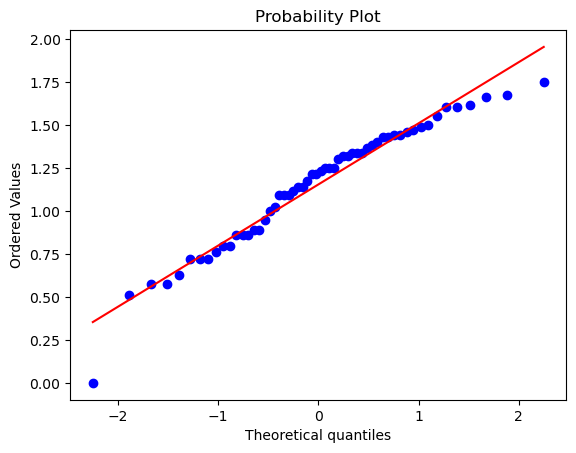

In [68]:
# We can use the Shapiro-Wilk test
data_MR_transformed_dropna = MR.dropna()
_, p_value_SW = stats.shapiro(data_MR_transformed_dropna['MR'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data_MR_transformed_dropna['MR'], dist="norm", plot=plt)
plt.show()

> Now you can use the I chart on the transformed data.

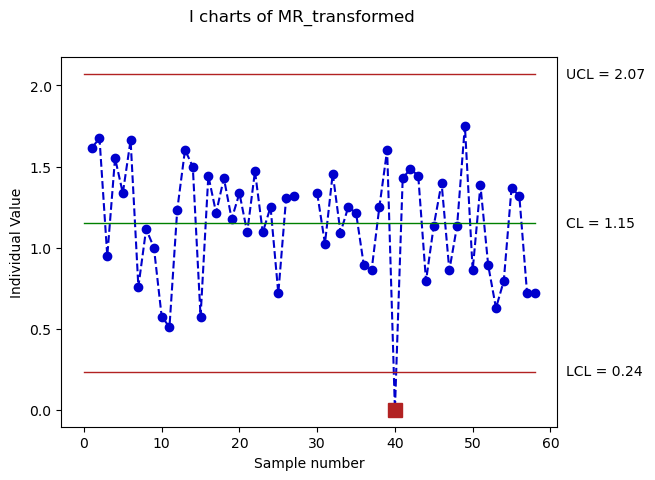

In [69]:
# Change the name of the column in MR to 'MR_transformed'
MR = MR.rename(columns = {'MR': 'MR_transformed'})
data_MR_transformed = qda.ControlCharts.IMR(MR, 'MR_transformed', K = K_alpha, plotit = False)

# Plot the I chart with the transformed data
fig, ax = plt.subplots(1, 1)
fig.suptitle(('I charts of MR_transformed'))
ax.plot(data_MR_transformed['MR_transformed'], color='mediumblue', linestyle='--', marker='o')
ax.plot(data_MR_transformed['I_UCL'], color='firebrick', linewidth=1)
ax.plot(data_MR_transformed['I_CL'], color='g', linewidth=1)
ax.plot(data_MR_transformed['I_LCL'], color='firebrick', linewidth=1)
ax.set_ylabel('Individual Value')
ax.set_xlabel('Sample number')
# add the values of the control limits on the right side of the plot
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(data_MR_transformed['I_UCL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_CL'].iloc[0], 'CL = {:.2f}'.format(data_MR_transformed['I_CL'].iloc[0]), verticalalignment='center')
ax.text(len(data_MR_transformed)+3, data_MR_transformed['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(data_MR_transformed['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
ax.plot(data_MR_transformed['I_TEST1'], linestyle='none', marker='s', color='firebrick', markersize=10)
plt.show()
